# TV, halftime shows, and the Big Game
Whether or not you like football, the Super Bowl is a spectacle. There's drama in the form of blowouts, comebacks, and controversy in the games themselves. There are the ridiculously expensive ads, some hilarious, others gut-wrenching, thought-provoking, and weird. The halftime shows with the biggest musicians in the world, sometimes riding a giant mechanical tiger or leaping from the roof of the stadium.

In this project, you will find out how some of the elements interact with each other.

 - What are the most extreme game outcomes?
 - How does point difference affect television viewership?
 - How have viewership, TV ratings, and advertisement costs evolved?
 - Who are the most prolific musicians in terms of halftime show performances?

The dataset used in this Project was scraped and polished from Wikipedia. It is made up of three CSV files, one with game data, one with TV data, and one with halftime musician data for all 52 Super Bowls through 2018.
## 1. Introduction
<p>Whether or not you like American football, the Super Bowl is a spectacle. There is always a little something for everyone. For the die-hard fans, there is the game itself with blowouts, comebacks, and controversy. For the not so die-hard fans, there are the ridiculously expensive ads that are hilarious, gut-wrenching, thought-provoking, and sometimes weird. And of course, there are the halftime shows with the biggest musicians in the world entertaining us by <a href="https://youtu.be/ZD1QrIe--_Y?t=14">riding a giant mechanical tiger</a> or <a href="https://youtu.be/mjrdywp5nyE?t=62">leaping from the roof of the stadium</a>. It is a grand show! In this notebook, we're going to explore how some of these elements interact with each other. After exploring and cleaning the data, we're going to answer questions like:</p>
<ul>
<li>What are the most extreme game outcomes?</li>
<li>How does the score difference affect television viewership?</li>
<li>How have viewership, TV ratings, and advertisement costs evolved?</li>
<li>Who are the most prolific musicians in terms of halftime show performances?</li>
</ul>
<p><img src="https://assets.datacamp.com/production/project_691/img/left_shark.jpg" alt="Left Shark Steals The Show">
<em><a href="https://www.flickr.com/photos/huntleypaton/16464994135/in/photostream/">Left Shark Steals The Show</a>. Katy Perry performing at halftime of Super Bowl XLIX. Photo by Huntley Paton. Attribution-ShareAlike 2.0 Generic (CC BY-SA 2.0).</em></p>
<p>The dataset we'll use was <a href="https://en.wikipedia.org/wiki/Web_scraping">scraped</a> and polished from Wikipedia. It is made up of three CSV files, one with <a href="https://en.wikipedia.org/wiki/List_of_Super_Bowl_champions">game data</a>, one with <a href="https://en.wikipedia.org/wiki/Super_Bowl_television_ratings">TV data</a>, and one with <a href="https://en.wikipedia.org/wiki/List_of_Super_Bowl_halftime_shows">halftime musician data</a> for all 52 Super Bowls 

In [1]:
# Load packages
library(tidyverse)

# Load the CSV data
super_bowls  <-  read_csv("datasets/super_bowls.csv")
tv  <-  read_csv("datasets/tv.csv")
halftime_musicians  <-  read_csv("datasets/halftime_musicians.csv")

# Display the first six rows of each tibble
head(super_bowls, 6)
head(tv, 6)
head(halftime_musicians, 6)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Parsed with column specification:
cols(
  date = col_date(format = ""),
  super_bowl = col_double(),
  venue = col_character(),
  city = col_character(),
  state = col_character(),
  attendance = col_double(),
  team_winner = col_character(),
  winning_pts = col_double(),
  qb_winner_1 = col_character(),
  qb_winner_2 = col_character(),
  coach_winner = col_charac

date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NA,Doug Pederson,New England Patriots,33,Tom Brady,NA,Bill Belichick,74,8
2017-02-05,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,NA,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NA,Dan Quinn,62,6
2016-02-07,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,NA,Gary Kubiak,Carolina Panthers,10,Cam Newton,NA,Ron Rivera,34,14
2015-02-01,49,University of Phoenix Stadium,Glendale,Arizona,70288,New England Patriots,28,Tom Brady,NA,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NA,Pete Carroll,52,4
2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NA,Pete Carroll,Denver Broncos,8,Peyton Manning,NA,John Fox,51,35
2013-02-03,47,Mercedes-Benz Superdome,New Orleans,Louisiana,71024,Baltimore Ravens,34,Joe Flacco,NA,John Harbaugh,San Francisco 49ers,31,Colin Kaepernick,NA,Jim Harbaugh,65,3


super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost
52,NBC,103390000,NA,43.1,68,33.4,78,5000000
51,Fox,111319000,172000000,45.3,73,37.1,79,5000000
50,CBS,111864000,167000000,46.6,72,37.7,79,5000000
49,NBC,114442000,168000000,47.5,71,39.1,79,4500000
48,Fox,112191000,167000000,46.7,69,39.3,77,4000000
47,CBS,108693000,164100000,46.3,69,39.7,77,4000000


super_bowl,musician,num_songs
52,Justin Timberlake,11
52,University of Minnesota Marching Band,1
51,Lady Gaga,7
50,Coldplay,6
50,Beyoncé,3
50,Bruno Mars,3


## 2. Taking note of dataset issues
From the quick look at the Super Bowl game data, we can see that the dataset appears whole except for missing values in the backup quarterback columns (qb_winner_2 and qb_loser_2), which make sense given most starting QBs in the Super Bowl (qb_winner_1 and qb_loser_1) play the entire game.

From the visual inspection of TV and halftime musicians data, there is only one missing value displayed, but I've got a hunch there are more. The first Super Bowl was played on January 15, 1967, and I'm guessing some data (e.g., the number of songs performed) probably weren't tracked reliably over time. Wikipedia is great but not perfect.

Looking at a summary of the datasets shows us that there are multiple columns with null values.

In [2]:
# Summary of the TV data
summary(tv)

# Summary of the halftime musician data 
summary(halftime_musicians)

   super_bowl      network          avg_us_viewers      total_us_viewers   
 Min.   : 1.00   Length:53          Min.   : 24430000   Min.   : 51180000  
 1st Qu.:13.00   Class :character   1st Qu.: 73852000   1st Qu.:142900000  
 Median :26.00   Mode  :character   Median : 85240000   Median :153400000  
 Mean   :26.02                      Mean   : 80709585   Mean   :148872000  
 3rd Qu.:39.00                      3rd Qu.: 92570000   3rd Qu.:165550000  
 Max.   :52.00                      Max.   :114442000   Max.   :172000000  
                                                        NA's   :38         
 rating_household share_household  rating_18_49    share_18_49   
 Min.   :18.5     Min.   :36.00   Min.   :33.40   Min.   :77.00  
 1st Qu.:41.3     1st Qu.:63.00   1st Qu.:36.90   1st Qu.:77.25  
 Median :43.3     Median :67.00   Median :37.90   Median :78.50  
 Mean   :42.7     Mean   :66.38   Mean   :38.01   Mean   :78.17  
 3rd Qu.:46.0     3rd Qu.:71.00   3rd Qu.:39.50   3rd Qu.:79.0

   super_bowl      musician           num_songs     
 Min.   : 1.00   Length:134         Min.   : 1.000  
 1st Qu.:17.25   Class :character   1st Qu.: 1.000  
 Median :31.50   Mode  :character   Median : 2.000  
 Mean   :29.09                      Mean   : 2.955  
 3rd Qu.:41.00                      3rd Qu.: 3.250  
 Max.   :52.00                      Max.   :11.000  
                                    NA's   :46      

## 3. Combined points distribution
In the TV data, the following columns have a lot of missing values:

total_us_viewers (amount of U.S. viewers who watched at least some part of the broadcast)
rating_18_49 (average % of U.S. adults 18-49 who live in a household with a TV that were watching for the entire broadcast)
share_18_49 (average % of U.S. adults 18-49 who live in a household with a TV in use that were watching for the entire broadcast)
In halftime musician data, there are missing numbers of songs performed (num_songs) for about a third of the musicians.

There are a lot of potential reasons for missing values. Were the data ever tracked? Would the research effort to fill in the gaps be worth it? Maybe. Watching every Super Bowl halftime show to get song counts could be pretty fun. But we don't have time to do that now! Let's take note of where the datasets are not perfect and start uncovering some insights.

We'll start by visualizing the distribution of combined points for each Super Bowl. Let's also find the Super Bowls with the highest and lowest scores.

date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NA,Doug Pederson,New England Patriots,33,Tom Brady,NA,Bill Belichick,74,8
1995-01-29,29,Joe Robbie Stadium,Miami Gardens,Florida,74107,San Francisco 49ers,49,Steve Young,NA,George Seifert,San Diego Chargers,26,Stan Humphreys,NA,Bobby Ross,75,23
1975-01-12,9,Tulane Stadium,New Orleans,Louisiana,80997,Pittsburgh Steelers,16,Terry Bradshaw,NA,Chuck Noll,Minnesota Vikings,6,Fran Tarkenton,NA,Bud Grant,22,10
1973-01-14,7,Memorial Coliseum,Los Angeles,California,90182,Miami Dolphins,14,Bob Griese,NA,Don Shula,Washington Redskins,7,Bill Kilmer,NA,George Allen,21,7
1969-01-12,3,Orange Bowl,Miami,Florida,75389,New York Jets,16,Joe Namath,NA,Weeb Ewbank,Baltimore Colts,7,Earl Morrall,Johnny Unitas,Don Shula,23,9


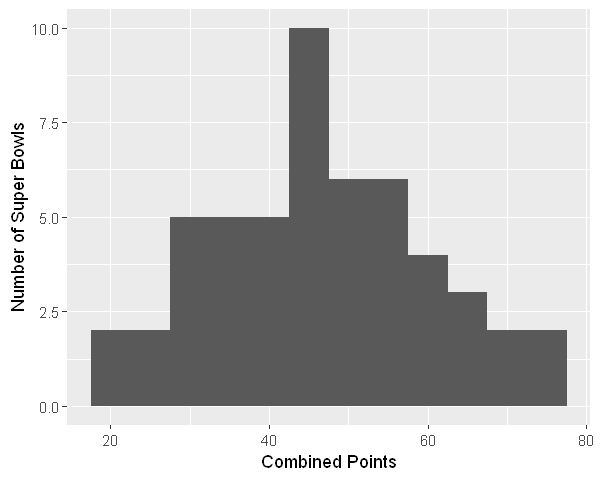

In [3]:
# Reduce the size of the plots
options(repr.plot.width = 5, repr.plot.height = 4)

# Plot a histogram of combined points
ggplot(super_bowls, aes(combined_pts)) +
 geom_histogram(binwidth = 5) +
 labs(x = "Combined Points", y = "Number of Super Bowls")

# Display the highest- and lowest-scoring Super Bowls
super_bowls  %>% 
 filter(combined_pts > 70 | combined_pts < 25)

## 4. Point difference distribution
Most of the combined scores are between 40 and 50 points, with the extremes being roughly equal distance away in opposite directions. At the highest combined scores of 74 and 75, are two games featuring dominant quarterback performances. One happened last year - Super Bowl LII when Tom Brady's Patriots lost to Nick Foles' underdog Eagles 33 to 41, for a combined score of 74.

On the other end of the spectrum, we have Super Bowl III and VII, which featured tough defenses that dominated the games. We also have Super Bowl IX in New Orleans in 1975, whose 16-6 score can be attributed to inclement weather. Overnight rain made the field slick, and it was cold (46 °F / 8 °C), making it hard for the Steelers and Vikings to do much offensively. This was the second-coldest Super Bowl ever and the last to be played in inclement weather for over 30 years. The NFL realized people like points, I guess.

UPDATE: In Super Bowl LIII in 2019, the Patriots and Rams broke the record for the lowest-scoring Super Bowl with a combined score of 16 points (13-3 for the Patriots).

Now let's take a look at the point difference between teams in each Super Bowl.

date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
1991-01-27,25,Tampa Stadium,Tampa,Florida,73813,New York Giants,20,Jeff Hostetler,NA,Bill Parcells,Buffalo Bills,19,Jim Kelly,NA,Marv Levy,39,1
1990-01-28,24,Louisiana Superdome,New Orleans,Louisiana,72919,San Francisco 49ers,55,Joe Montana,NA,George Seifert,Denver Broncos,10,John Elway,NA,Dan Reeves,65,45


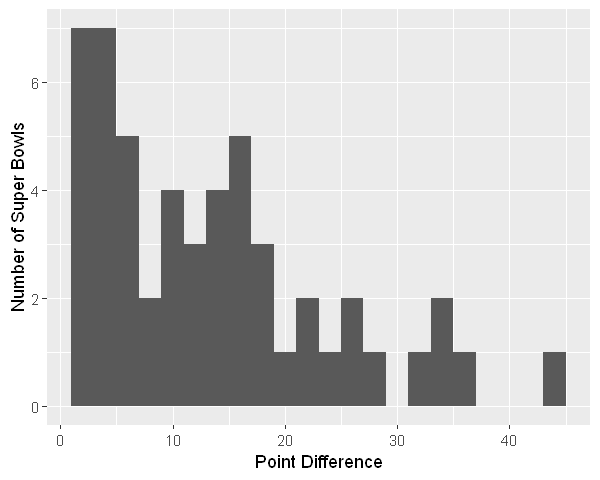

In [4]:
# Reduce the size of the plots
options(repr.plot.width = 5, repr.plot.height = 4)

# Plot a histogram of point differences
ggplot(super_bowls, aes(difference_pts)) +
 geom_histogram(binwidth = 2) +
 labs(x = "Point Difference", y = "Number of Super Bowls")

# Display the closest game and largest blow out
super_bowls  %>% 
 filter(difference_pts == min(difference_pts) | difference_pts == max(difference_pts))

## 5. Do blowouts translate to lost viewers?
The vast majority of Super Bowls are close games. Makes sense. Both teams are the best in their conference if they've made it this far. The closest game ever was the Buffalo Bills' 1-point loss to the New York Giants in 1991, which is best remembered for Scott Norwood's last-second missed field goal attempt that went wide right, kicking off four Bills Super Bowl losses in a row. Poor Scott. The biggest point spread so far is 45 points (!) when Hall of Famer, Joe Montana, led the San Francisco 49ers to victory in 1990, one year before the closest game ever.

I remember watching the Seahawks crush the Broncos by 35 points (43-8) in 2014, which was a boring experience in my opinion. The game was never really close. I'm pretty sure we changed the channel at the end of the third quarter. Let's combine the game data and TV data to see if this is a universal phenomenon. Do large point differences translate to lost viewers? We can plot household share (average percentage of U.S. households with a TV in use that were watching for the entire broadcast) vs. point difference to find out.

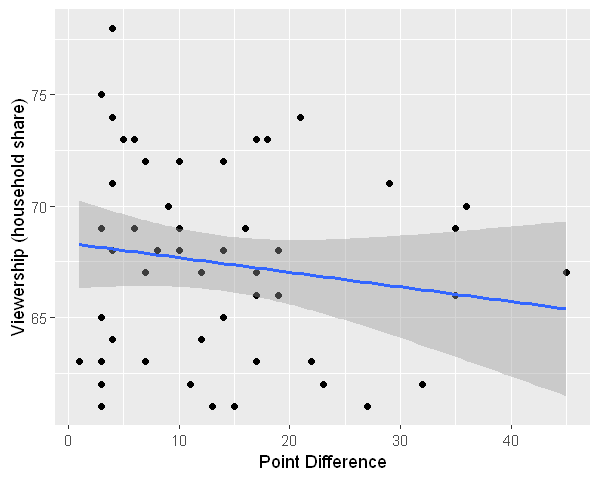

In [5]:
# Filter out Super Bowl I and join the game data and TV data
games_tv <- tv  %>% 
 filter(super_bowl != 1)  %>% 
 inner_join(super_bowls, by = "super_bowl")

# Create a scatter plot with a linear regression model
ggplot(games_tv, aes(x = difference_pts, y = share_household)) +
 geom_point() +
 geom_smooth(method = "lm") +
 labs(x = "Point Difference", y = "Viewership (household share)")

## 6. Viewership and the ad industry over time
The downward sloping regression line and the 95% confidence interval for that regression suggest that bailing on the game if it is a blowout is common. Though it matches our intuition, we must take it with a grain of salt because the linear relationship in the data is weak due to our small sample size of 52 games.

Regardless of the score, I bet most people stick it out for the halftime show, which is good news for the TV networks and advertisers. A 30-second spot costs a pretty $5 million now, but has it always been that much? And how has the number of viewers and household ratings trended alongside advertisement cost? We can find out using line plots that share a "Super Bowl" x-axis.

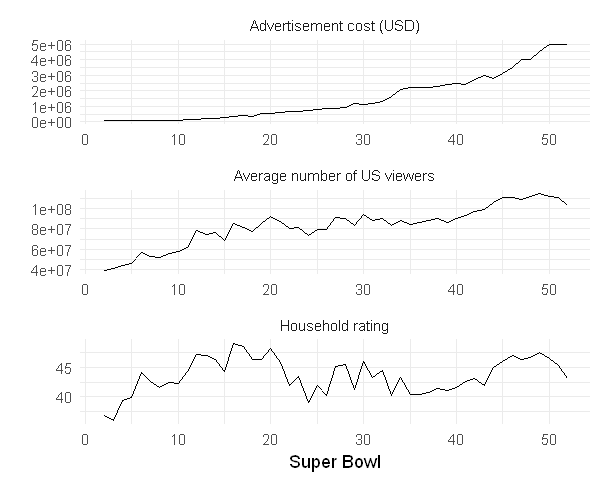

In [6]:
# Convert the data format for plotting
games_tv_plot  <- games_tv %>% 
    gather(key = "category", value = "value", "avg_us_viewers", "rating_household", "ad_cost")  %>% 
    mutate(cat_name = case_when(category == "avg_us_viewers" ~ "Average number of US viewers",
                                category == "rating_household" ~ "Household rating",
                                category == "ad_cost" ~ "Advertisement cost (USD)",
                                TRUE ~ as.character(category)))

# Plot the data
ggplot(games_tv_plot, aes(x = super_bowl, y = value)) +
 geom_line() +
 facet_wrap(~ cat_name, scales = "free", nrow = 3) + 
 labs(x = "Super Bowl", y = "") + theme_minimal()
 #.... YOUR CODE FOR TASK 6 ....

## 7. Halftime shows weren't always this great
We can see that the number of viewers increased before advertisement costs did. Maybe the networks weren't very data savvy and were slow to react? Makes sense since DataCamp didn't exist back then.

Another hypothesis: maybe halftime shows weren't as entertaining in the earlier years? The modern spectacle that is the Super Bowl has a lot to do with of big halftime acts. I went down a YouTube rabbit hole, and it turns out that older halftime shows were not quite the spectacle they are today. Some examples:

Super Bowl XXVI in 1992: A Frosty The Snowman rap performed by children.
Super Bowl XXIII in 1989: An Elvis impersonator who did magic tricks and didn't even sing one Elvis song.
Super Bowl XXI in 1987: Tap dancing ponies. Okay, that was pretty awesome actually.
It turns out that Michael Jackson's Super Bowl XXVII performance, one of the most watched events in American TV history, was when the NFL realized that the having big-name halftime acts brought in more viewers. Let's look at the halftime acts before Michael Jackson brought the NFL and entertainment industry together.

In [7]:
# Filter and diplay halftime musicians before and including Super Bowl XXVII
( pre_MJ  <- halftime_musicians  %>% 
 filter(super_bowl <= 27) )

super_bowl,musician,num_songs
27,Michael Jackson,5
26,Gloria Estefan,2
26,University of Minnesota Marching Band,NA
25,New Kids on the Block,2
24,Pete Fountain,1
24,Doug Kershaw,1
24,Irma Thomas,1
24,Pride of Nicholls Marching Band,NA
24,The Human Jukebox,NA
24,Pride of Acadiana,NA


## 8. Who has the most halftime show appearances?
Now that's a lot of marching bands! There was also the American jazz clarinetist, Pete Fountain, and Miss Texas 1973 played the violin. Nothing against those performers - they are just simply not Beyoncé. To be fair, no one is.

Let's find all the musicians who performed at the Super Bowl more than once and count their performances.

In [8]:
# Display the musicians who performed more than once
halftime_musicians  %>% 
    count(musician, sort = TRUE)  %>% 
    filter(n > 1) 

musician,n
Grambling State University Tiger Marching Band,6
Al Hirt,4
Up with People,4
The Human Jukebox,3
Beyoncé,2
Bruno Mars,2
Florida A&M University Marching 100 Band,2
Gloria Estefan,2
Justin Timberlake,2
Los Angeles Unified School District All City Honor Marching Band,2


## 9. Who performed the most songs in a halftime show?
The world-famous Grambling State University Tiger Marching Band takes the crown with six appearances. Beyoncé, Justin Timberlake, Nelly, and Bruno Mars are the only post-Y2K musicians with multiple appearances (two each).

Now let's look at the number of songs performed in a halftime show. From our previous inspections, the num_songs column has a lot of missing values:

A lot of the marching bands don't have num_songs entries.
For non-marching bands, there is a lot of missing data before Super Bowl XX.
Let's filter out marching bands by using a string match for "Marching" and "Spirit" (a common naming convention for marching bands is "Spirit of [something]"). We'll only keep data from Super Bowls XX and later to address the missing data issue, and then let's see who performed the most number of songs.

Warning message:
"Removed 2 rows containing non-finite values (stat_bin)."

super_bowl,musician,num_songs
52,Justin Timberlake,11
30,Diana Ross,10
49,Katy Perry,8
51,Lady Gaga,7
47,Beyoncé,7
41,Prince,7
23,Elvis Presto,7
50,Coldplay,6
48,Bruno Mars,6
45,The Black Eyed Peas,6


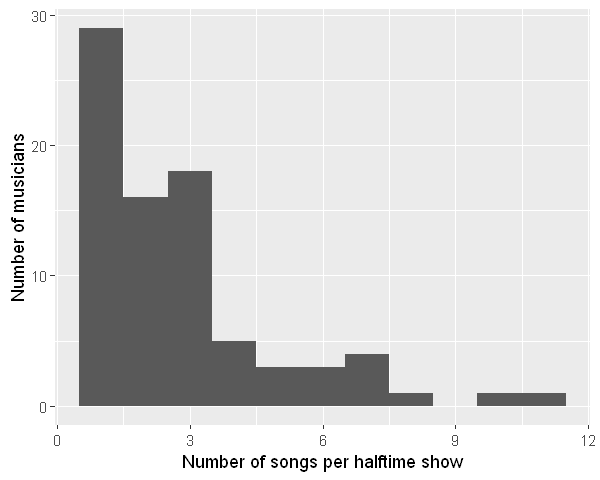

In [9]:
# Remove marching bands and data before Super Bowl XX
musicians_songs  <- halftime_musicians  %>% 
    filter(!str_detect(musician, "Marching"),
           !str_detect(musician, "Spirit"),
          super_bowl > 20)

# Plot a histogram of the number of songs per performance
ggplot(musicians_songs, aes(num_songs)) + 
    geom_histogram(binwidth = 1) +
    labs(x = "Number of songs per halftime show", y = "Number of musicians")

# Display the musicians with more than four songs per show
musicians_songs  %>% 
    filter(num_songs > 4)  %>% 
    arrange(desc(num_songs))

## 10. Conclusion
Most non-band musicians do 1 to 3 songs per halftime show. It's important to note that the duration of the halftime show is fixed (roughly 12 minutes) so songs per performance is more a measure of how many hit songs you have (cram as many hit songs in as you can!). Timberlake went off in 2018 with 11 songs! Wow! Diana Ross comes in second with a ten song medley in 1996.

In this notebook, we loaded, cleaned, and explored Super Bowl game, television, and halftime show data. We visualized the distributions of combined points, point differences, and halftime show performances using histograms. We used line plots to see how advertisement cost increases lagged behind viewership increases. And, we discovered that blowouts appear to lead to a drop in viewership.

In [11]:
# 2018-2019 conference champions
patriots <-  "New England Patriots"
rams  <- "Los Angeles Rams"

# Who will win Super Bowl LIII?
super_bowl_LIII_winner  <-  c(patriots, rams)
paste("The winner of Super Bowl LIII will be the", super_bowl_LIII_winner)

[1] "The winner of Super Bowl LIII will be the New England Patriots"
[2] "The winner of Super Bowl LIII will be the Los Angeles Rams"